In [115]:
import os
import json
import sqlite3

import pandas as pd
import numpy as np

# for RNN
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset

In [2]:
filepath = 'data/'

In [3]:
data = []

for filename in os.listdir(filepath):
    cnx = sqlite3.connect(filepath + filename)
    df_string = pd.read_sql_query("SELECT * FROM COUNTERS_STRING_TIME_DATA", cnx)
    df_ull = pd.read_sql_query("SELECT * FROM COUNTERS_ULL_TIME_DATA", cnx)
    df_data = pd.concat([df_string, df_ull], ignore_index = True)
    data.append(pd.DataFrame(df_data))

In [4]:
df = pd.concat(data, ignore_index = True)

In [5]:
df['MEASUREMENT_TIME'] = pd.to_datetime(df['MEASUREMENT_TIME'])
df['PRIVATE_DATA'] = df['PRIVATE_DATA'].astype(int)
df['VALUE'] = df['VALUE'].str.lower()

In [6]:
df.dtypes

MEASUREMENT_TIME    datetime64[ns]
ID_INPUT                     int64
VALUE                       object
PRIVATE_DATA                 int32
dtype: object

In [7]:
df = df.sort_values(by = ['MEASUREMENT_TIME'], ignore_index = True)

In [8]:
df

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,2023-01-15 18:20:31.552,3,esrv.exe,0
1,2023-01-15 18:20:31.552,11,NaN,0
2,2023-01-15 18:20:31.552,10,NaN,0
3,2023-01-15 18:20:31.552,9,NaN,0
4,2023-01-15 18:20:31.552,8,NaN,0
...,...,...,...,...
3919,2023-01-16 04:29:33.175,5,consolewindowclass,0
3920,2023-01-16 04:29:33.175,10,NaN,0
3921,2023-01-16 04:29:33.175,3,esrv.exe,0
3922,2023-01-16 04:29:33.175,1,NaN,0


In [12]:
df.shape[0]/12 # number of unique entries

327.0

In [15]:
import numpy as np
import pandas as pd

In [21]:
tmp = df[df.ID_INPUT == 4]

In [23]:
tmp.VALUE.unique()

array(['vsdebugconsole.exe', 'explorer.exe', 'devenv.exe',
       'applicationframehost.exe', 'chrome.exe',
       'shellexperiencehost.exe', 'searchapp.exe',
       'unable to open process', 'snippingtool.exe',
       'db browser for sqlite.exe', 'code.exe',
       'codesetup-stable-97dec172d3256f8ca4bfb2143f3f76b503ca0534.tmp',
       'idman.exe', 'msedge.exe'], dtype=object)

In [24]:
len(tmp.VALUE.unique())

14

In [31]:
tmp.groupby('VALUE').count().sort_values(by="ID_INPUT", ascending=False) # executable can have the extension "tmp"

,MEASUREMENT_TIME,ID_INPUT,PRIVATE_DATA
VALUE,,,
chrome.exe,88,88,88
vsdebugconsole.exe,44,44,44
explorer.exe,43,43,43
msedge.exe,27,27,27
applicationframehost.exe,25,25,25
unable to open process,24,24,24
code.exe,23,23,23
devenv.exe,12,12,12
shellexperiencehost.exe,12,12,12


In [33]:
len(df.PRIVATE_DATA.unique())

1

In [43]:
df = df.assign(date = df["MEASUREMENT_TIME"].astype(str).apply(lambda x: x[:10]))

In [46]:
df.groupby('date').count()

,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
date,,,,
2023-01-15,2448,2448,612,2448
2023-01-16,1476,1476,369,1476


In [49]:
tab_app = df[df.ID_INPUT == 3]
tab_app.groupby('VALUE').count()

,MEASUREMENT_TIME,ID_INPUT,PRIVATE_DATA,date
VALUE,,,,
.rhistory - visual studio code,1,1,1,1
"74% dan pilone, russ miles - head first ...pdf",1,1,1,1
[cse 110] weekly reading - google docs - google chrome,14,14,14,14
[dsc180b] - google docs - google chrome,1,1,1,1
[dsc180b] weekly homework - google docs - google chrome,1,1,1,1
...,...,...,...,...
visual studio code,2,2,2,2
volume control,10,10,10,10
worked_problems_section_53.pdf - google chrome,3,3,3,3


In [53]:
tab_app['VALUE'][:20]

0                                               esrv.exe
18                                             downloads
28                                              esrv.exe
46            dsc180a_hw_week4 - microsoft visual studio
56                                           movies & tv
68            dsc180a_hw_week4 - microsoft visual studio
82                                              esrv.exe
94                                              esrv.exe
105                                          movies & tv
113                                      missing string.
120                                          movies & tv
142                                            downloads
146                                          movies & tv
166                                            downloads
176                                      missing string.
183                                            downloads
198                                          movies & tv
204    public -- 2022-2023 (ccg

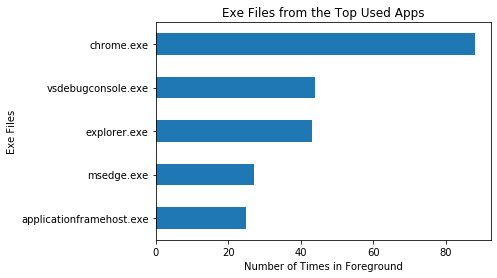

In [9]:
import matplotlib.pyplot as plt
plot = df[df['ID_INPUT'] == 4]['VALUE'].value_counts()[:5].plot.barh(x = 'index', y = 'VALUE')
plot.set_axisbelow(True)
plot.set_xlabel('Number of Times in Foreground')
plot.set_ylabel('Exe Files')
plot.set_title('Exe Files from the Top Used Apps')
plot.invert_yaxis()
#plt.pyplot.grid(axis = 'x')
#plt.pyplot.show()

### Process data for LSTM

In [3]:
df = pd.read_csv("dataUser1.csv")
df.head()

,Unnamed: 0,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA
0,0,2023-01-15 18:20:31.552,4,s0,0
1,1,2023-01-15 18:20:31.552,11,0,0
2,2,2023-01-15 18:20:31.552,10,0,0
3,3,2023-01-15 18:20:31.552,8,154,0
4,4,2023-01-15 18:20:31.552,7,1049,0


In [4]:
df['MEASUREMENT_TIME'] = pd.to_datetime(df['MEASUREMENT_TIME'])

In [5]:
df = df.assign(day_of_week = df['MEASUREMENT_TIME'].apply(lambda x: x.strftime("%A"))) # https://www.w3schools.com/python/python_datetime.asp

In [6]:
df = df.assign(week_of_year = df['MEASUREMENT_TIME'].apply(lambda x: x.strftime("%W")))

In [7]:
df = df.assign(week_day = df['week_of_year'] + '_' + df['day_of_week'])

In [8]:
df = df[df['ID_INPUT'] == 4]

In [9]:
df = df.reset_index()

In [10]:
duration_series = df[df['ID_INPUT'] == 4].groupby('week_day')['MEASUREMENT_TIME'].diff()[1:]
end_point = pd.Series([duration_series[1]])
app_duration = pd.concat([duration_series, end_point], ignore_index=True)

In [11]:
duration_series

1             00:00:00
2      00:00:02.023000
3      00:00:03.031000
4      00:00:03.021000
5      00:00:01.015000
             ...      
2887   00:00:12.089000
2888   00:03:45.056000
2889   00:02:15.477000
2890   00:00:02.023000
2891   00:00:09.105000
Name: MEASUREMENT_TIME, Length: 2891, dtype: timedelta64[ns]

In [14]:
df

,level_0,index,Unnamed: 0,MEASUREMENT_TIME,ID_INPUT,VALUE,PRIVATE_DATA,day_of_week,week_of_year,week_day
0,0,0,0,2023-01-15 18:20:31.552,4,s0,0,Sunday,02,02_Sunday
1,1,11,11,2023-01-15 18:20:31.552,4,VsDebugConsole.exe,0,Sunday,02,02_Sunday
2,2,23,23,2023-01-15 18:20:33.575,4,explorer.exe,0,Sunday,02,02_Sunday
3,3,28,28,2023-01-15 18:20:36.606,4,VsDebugConsole.exe,0,Sunday,02,02_Sunday
4,4,46,46,2023-01-15 18:20:39.627,4,devenv.exe,0,Sunday,02,02_Sunday
...,...,...,...,...,...,...,...,...,...,...
2887,2887,34215,34215,2023-01-27 10:16:22.829,4,Code.exe,0,Friday,04,04_Friday
2888,2888,34220,34220,2023-01-27 10:20:07.885,4,chrome.exe,0,Friday,04,04_Friday
2889,2889,34236,34236,2023-01-27 10:22:23.362,4,Code.exe,0,Friday,04,04_Friday
2890,2890,34250,34250,2023-01-27 10:22:25.385,4,chrome.exe,0,Friday,04,04_Friday


In [15]:
df = df.assign(app_duration = app_duration)

In [121]:
# import datetime
# datetime.datetime.strptime('00:00:00', '%H:%M:%S').time()

In [31]:
app_delta_time = df.groupby(['VALUE', 'week_day'])['app_duration'].sum().reset_index()

In [34]:
app_delta_time

,VALUE,week_day,app_duration
0,ApplicationFrameHost.exe,02_Sunday,00:09:18.960000
1,ApplicationFrameHost.exe,03_Friday,00:00:07.076000
2,ApplicationFrameHost.exe,03_Monday,00:01:56.999000
3,ApplicationFrameHost.exe,03_Sunday,00:00:32.267000
4,ApplicationFrameHost.exe,03_Thursday,01:10:32.025000
...,...,...,...
157,s0,04_Friday,00:00:05.058000
158,s0,04_Monday,00:08:34.863000
159,s0,04_Thursday,00:00:00
160,s0,04_Tuesday,00:00:04.044000


In [35]:
duration_in_hours = app_delta_time['app_duration'].apply(lambda x: x.total_seconds() / 3600)

In [36]:
app_delta_time = app_delta_time.assign(app_duration = duration_in_hours)

In [37]:
app_delta_time[app_delta_time['VALUE'] == 'chrome.exe']

,VALUE,week_day,app_duration
97,chrome.exe,02_Sunday,4.607893
98,chrome.exe,03_Friday,6.220594
99,chrome.exe,03_Monday,9.291191
100,chrome.exe,03_Saturday,6.719089
101,chrome.exe,03_Sunday,6.617694
102,chrome.exe,03_Thursday,4.950518
103,chrome.exe,03_Tuesday,7.756862
104,chrome.exe,03_Wednesday,4.710665
105,chrome.exe,04_Friday,3.910719
106,chrome.exe,04_Monday,5.451440


In [100]:
week = app_delta_time['week_day'].apply(lambda x: int(x[:2]))
one_hot_day_encoded = {
    'Monday': [1,0,0,0,0,0,0],
    'Tuesday': [0,1,0,0,0,0,0],
    'Wednesday': [0,0,1,0,0,0,0],
    'Thursday': [0,0,0,1,0,0,0],
    'Friday': [0,0,0,0,1,0,0],
    'Saturday': [0,0,0,0,0,1,0],
    'Sunday': [0,0,0,0,0,0,1]
}
    
day  = app_delta_time['week_day'].apply(lambda x: one_hot_day_encoded[x[3:]])
app_delta_time = app_delta_time.assign(week = week, day = day)

In [87]:
app_delta_time

,VALUE,week_day,app_duration,week,day
0,ApplicationFrameHost.exe,02_Sunday,0.155267,2,"[tensor(0), tensor(0), tensor(0), tensor(0), t..."
1,ApplicationFrameHost.exe,03_Friday,0.001966,3,"[tensor(0), tensor(0), tensor(0), tensor(0), t..."
2,ApplicationFrameHost.exe,03_Monday,0.032500,3,"[tensor(1), tensor(0), tensor(0), tensor(0), t..."
3,ApplicationFrameHost.exe,03_Sunday,0.008963,3,"[tensor(0), tensor(0), tensor(0), tensor(0), t..."
4,ApplicationFrameHost.exe,03_Thursday,1.175562,3,"[tensor(0), tensor(0), tensor(0), tensor(1), t..."
...,...,...,...,...,...
157,s0,04_Friday,0.001405,4,"[tensor(0), tensor(0), tensor(0), tensor(0), t..."
158,s0,04_Monday,0.143018,4,"[tensor(1), tensor(0), tensor(0), tensor(0), t..."
159,s0,04_Thursday,0.000000,4,"[tensor(0), tensor(0), tensor(0), tensor(1), t..."
160,s0,04_Tuesday,0.001123,4,"[tensor(0), tensor(1), tensor(0), tensor(0), t..."


### LSTM Implementation Using PyTorch

In [39]:
# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [69]:
def get_feats_and_labs(app_name, in_df, feat_name = 'day', target_name = 'app_duration'):
    sub_df = in_df[in_df['VALUE'] == app_name]
    X = sub_df[feat_name]
    y = sub_df[target_name]
    return X, y

In [107]:
def train_val_test_split(in_df, app_name, split_ratios = [0.7, 0.2, 0.1]):
    X, y = get_feats_and_labs(app_name = app_name, in_df = in_df)
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=split_ratios[-1], shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=split_ratios[1], shuffle=False)
    return X_train.to_list(), X_val.to_list(), X_test.to_list(), np.array(y_train).reshape(-1,1), np.array(y_val).reshape(-1,1), np.array(y_test).reshape(-1,1)

In [108]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(app_delta_time, 'chrome.exe')

In [83]:
# Scale data to speed up model training
scaler = MinMaxScaler() 

y_train_scaled = scaler.fit_transform(y_train)
y_val_scaled = scaler.fit_transform(y_val)
y_test_scaled = scaler.fit_transform(y_test)

In [112]:
# Data into tensor
train_X = torch.Tensor(X_train)
train_y = torch.Tensor(y_train_scaled)

val_X = torch.Tensor(X_val)
val_y = torch.Tensor(y_val_scaled)

test_X = torch.Tensor(X_test)
test_y = torch.Tensor(y_test_scaled)

In [114]:
train = TensorDataset(train_X, train_y)
val = TensorDataset(val_X, val_y)
test = TensorDataset(test_X, test_y)

In [154]:
batch_size = 15
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(train, batch_size=1, shuffle=False, drop_last=True)

In [155]:
print(len(test_loader.dataset))

2


In [156]:
print(len(train_loader.dataset))

8


In [157]:
print(len(val_loader.dataset))

3


In [211]:
import warnings
warnings.filterwarnings("ignore")

In [210]:
# Model implementation
# Vanilla RNN
from torch import nn
class VanillaRNN(nn.Module):
    def __init__(self, input_dims, num_nodes, num_layers, output_dims, dropout_prob):
        super(VanillaRNN, self).__init__()

        self.num_nodes = num_nodes
        self.num_layers = num_layers
        
        self.vanilla_rnn = nn.RNN(input_dims, num_nodes, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(num_nodes, output_dims) # fully connected layer
        #print('after fc')
    
    def forward(self, x):
        hidden_0 = torch.zeros(self.num_layers, x.size(0), self.num_nodes).requires_grad_()
        
        forward_out, hidden_0 = self.vanilla_rnn(x, hidden_0.detach()) # forward propagation
        
        forward_out = forward_out[:, -1, :] # reshape the output for the fc
        out = self.fc(forward_out)
        
        return out


In [200]:
class Optimization:
    def __init__(self, model, loss_func, optimizer):
        self.model = model
        self.loss_func = loss_func
        self.optimizer = optimizer
        self.train_losses = np.array([])
        self.val_losses = np.array([])
    
    def train_step(self, x, y):
        #print('train step ', x)
        self.model.train()
        yhat = self.model(x) # preds
        loss = self.loss_func(y, yhat)
        loss.backward()
        self.optimizer.step()
        self.optimizer.zero_grad()
        return loss.item()

    def train(self, train_loader, val_loader, batch_size=7, n_epochs=50, n_feats=1):
        val_values = np.array([])
        val_preds = np.array([])

        for epoch in range(n_epochs):
            batch_losses = np.array([])
            #print(epoch)
            for x_batch, y_batch in train_loader.dataset:
                #print('train ', x_batch)
                x_batch = x_batch.view([batch_size, -1, n_feats]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses = np.append(batch_losses, loss)
            train_loss = np.mean(batch_losses)
            self.train_losses = np.append(self.train_losses, train_loss)

            with torch.no_grad():
                batch_val_losses = np.array([])
                for x_val, y_val in val_loader.dataset:
                    x_val = x_val.view([batch_size, -1, n_feats]).to(device)
                    y_val = y_val.to(device)

                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_func(y_val, yhat).item()
                    batch_val_losses = np.append(batch_val_losses, val_loss)
                    
                    val_values = np.append(val_values, y_val.to(device).detach().numpy())
                    val_preds = np.append(val_preds, yhat.to(device).detach().numpy())  
                    
                val_loss = np.mean(batch_val_losses)
                self.val_losses = np.append(self.val_losses, val_loss)

                
            if (epoch <= 10) | (epoch % 50 == 0):
                print(f'Training loss: {train_loss}, val loss {val_loss}')   
        
        return val_values, val_preds
    
    def evaluate(self, test_loader, batch_size=1, n_feats=1):
        with torch.no_grad():
            test_preds = np.array([])
            test_vals = np.array([])

            for x_test, y_test in test_loader.dataset:
                x_test = x_test.view([batch_size, -1, n_feats]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)

                test_vals = np.append(test_vals, y_test.to(device).detach().numpy())
                test_preds = np.append(test_preds, yhat.to(device).detach().numpy())

        return test_vals, test_preds
    

    def plot_losses(self):
        plt.plot(self.train_losses, label="train loss")
        plt.plot(self.val_losses, label='Val loss')
        plt.legend()
        plt.title('losses')
        plt.show()
        plt.close()

In [194]:
input_dims = 1
num_layers = 5
num_nodes = 5
output_dims = 1
batch_size = 7
n_epochs = 150
dropout = 0.1
lr = 1e-3
model_params = {
    'input_dims': input_dims,
    'num_nodes': num_nodes,
    'num_layers': num_layers,
    'output_dims': output_dims,
    'dropout_prob': dropout
}

In [203]:
from torch import optim
import random

Training loss: 0.6363094002008438, val loss 0.6172351688146591
Training loss: 0.5672070942819118, val loss 0.5430947095155716
Training loss: 0.4885259913280606, val loss 0.4690041368206342
Training loss: 0.4101133747026324, val loss 0.3972875024968137
Training loss: 0.36185537348501384, val loss 0.3761202320456505
Training loss: 0.3399863336235285, val loss 0.3619323968887329
Training loss: 0.330293748062104, val loss 0.35172369455297786
Training loss: 0.3223474593833089, val loss 0.3431115752706925
Training loss: 0.3077560840174556, val loss 0.3355699948345621
Training loss: 0.31220431812107563, val loss 0.3381713933000962
Training loss: 0.2870202139019966, val loss 0.3451089908679326
Training loss: 0.2527564719785005, val loss 0.39939146240552265
Training loss: 0.27499200217425823, val loss 0.4001832256714503


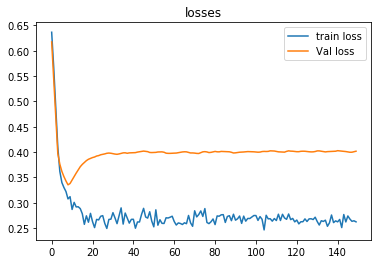

In [228]:
random.seed(0)
model = VanillaRNN(**model_params)
loss_func = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)
opt = Optimization(model=model, loss_func=loss_func, optimizer=optimizer)
val_values_vanilla, val_preds_vanilla = opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_feats=input_dims)
opt.plot_losses()

In [229]:
test_values_vanilla, test_preds_vanilla = opt.evaluate(test_loader_one, batch_size=1, n_feats=1)

In [230]:
test_values_vanilla

array([0.        , 0.34435162, 1.        , 0.45079276, 0.42914242,
       0.07315897, 0.67238277, 0.02194447])

In [231]:
test_preds_vanilla

array([0.53995675, 0.54794496, 0.53979194, 0.54003328, 0.53995675,
       0.53949416, 0.53848326, 0.54027671])

In [232]:
pd.DataFrame({
    'test_val': test_values_vanilla,
    'test_pred': test_preds_vanilla
})

,test_val,test_pred
0,0.000000,0.539957
1,0.344352,0.547945
2,1.000000,0.539792
3,0.450793,0.540033
4,0.429142,0.539957
5,0.073159,0.539494
6,0.672383,0.538483
7,0.021944,0.540277


Training loss: 0.9092351496219635, val loss 0.886709064245224
Training loss: 0.821124155074358, val loss 0.796179195245107
Training loss: 0.7361190281808376, val loss 0.7059162358442942
Training loss: 0.6672765612602234, val loss 0.6156362642844518
Training loss: 0.5423183739185333, val loss 0.5230270599325498
Training loss: 0.4846752118319273, val loss 0.4282284292081992
Training loss: 0.37247797986492515, val loss 0.3789050169289112
Training loss: 0.33447419572621584, val loss 0.3552805557847023
Training loss: 0.33756530145183206, val loss 0.33672520735611516
Training loss: 0.31766029447317123, val loss 0.3456662905712922
Training loss: 0.3018483556807041, val loss 0.3585068608323733
Training loss: 0.265369423199445, val loss 0.39021044472853345


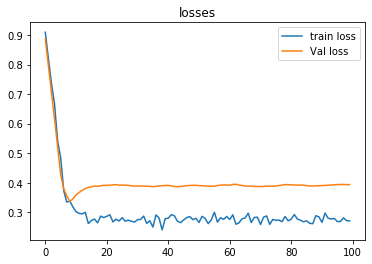

,test_val,test_pred
0,0.000000,0.213696
1,0.344352,0.208320
2,1.000000,0.209849
3,0.450793,0.210502
4,0.429142,0.213696
5,0.073159,0.208956
6,0.672383,0.209943
7,0.021944,0.209748


In [236]:
input_dims = 1
num_layers = 5
num_nodes = 5
output_dims = 1
batch_size = 7
n_epochs = 100
dropout = 0.1
lr = 1e-3
model_params = {
    'input_dims': input_dims,
    'num_nodes': num_nodes,
    'num_layers': num_layers,
    'output_dims': output_dims,
    'dropout_prob': dropout
}

model = VanillaRNN(**model_params)
loss_func = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)
opt = Optimization(model=model, loss_func=loss_func, optimizer=optimizer)
val_values_vanilla, val_preds_vanilla = opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_feats=input_dims)
opt.plot_losses()

test_values_vanilla, test_preds_vanilla = opt.evaluate(test_loader_one, batch_size=1, n_feats=1)
pd.DataFrame({
    'test_val': test_values_vanilla,
    'test_pred': test_preds_vanilla
})

Training loss: 0.7030996270477772, val loss 0.44581085443496704
Training loss: 0.3496847948990762, val loss 0.41875553131103516
Training loss: 0.2760223033837974, val loss 0.41427097221215564
Training loss: 0.2761869439855218, val loss 0.38947371145089466
Training loss: 0.2737089074216783, val loss 0.395487442612648
Training loss: 0.2661827113479376, val loss 0.40392862260341644
Training loss: 0.27259583678096533, val loss 0.41216925779978436
Training loss: 0.281256259419024, val loss 0.4027594675620397
Training loss: 0.27271267026662827, val loss 0.39524436990420025
Training loss: 0.27784634521231055, val loss 0.39929382006327313
Training loss: 0.275095735443756, val loss 0.41235530376434326
Training loss: 0.27184180403128266, val loss 0.4071376274029414


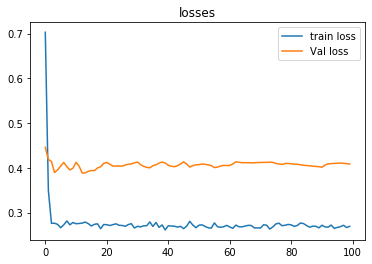

,test_val,test_pred
0,0.000000,0.366450
1,0.344352,0.344456
2,1.000000,0.357834
3,0.450793,0.362495
4,0.429142,0.366450
5,0.073159,0.362662
6,0.672383,0.355648
7,0.021944,0.356238


In [237]:
input_dims = 1
num_layers = 5
num_nodes = 5
output_dims = 1
batch_size = 7
n_epochs = 100
dropout = 0.1
lr = 1e-2
model_params = {
    'input_dims': input_dims,
    'num_nodes': num_nodes,
    'num_layers': num_layers,
    'output_dims': output_dims,
    'dropout_prob': dropout
}

model = VanillaRNN(**model_params)
loss_func = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)
opt = Optimization(model=model, loss_func=loss_func, optimizer=optimizer)
val_values_vanilla, val_preds_vanilla = opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_feats=input_dims)
opt.plot_losses()

test_values_vanilla, test_preds_vanilla = opt.evaluate(test_loader_one, batch_size=1, n_feats=1)
pd.DataFrame({
    'test_val': test_values_vanilla,
    'test_pred': test_preds_vanilla
})

Training loss: 0.6797800026834011, val loss 0.6550608476003011
Training loss: 0.5975815150886774, val loss 0.5791040460268656
Training loss: 0.5246149096637964, val loss 0.5013733382026354
Training loss: 0.4377044173888862, val loss 0.4209878562639157
Training loss: 0.3800403904169798, val loss 0.38074153785904247
Training loss: 0.3456202964298427, val loss 0.3624045054117839
Training loss: 0.3295946307480335, val loss 0.3494826406240463
Training loss: 0.3203800767660141, val loss 0.33908170523742837
Training loss: 0.3026627777144313, val loss 0.33642566204071045
Training loss: 0.3042322602123022, val loss 0.34463318934043247
Training loss: 0.28927506506443024, val loss 0.35227062925696373
Training loss: 0.2633118978701532, val loss 0.39841651419798535
Training loss: 0.27171509014442563, val loss 0.40261660516262054


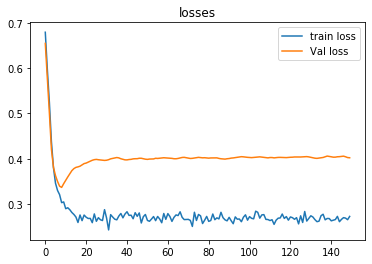

,test_val,test_pred
0,0.000000,0.295590
1,0.344352,0.295476
2,1.000000,0.295954
3,0.450793,0.296023
4,0.429142,0.295590
5,0.073159,0.295514
6,0.672383,0.295202
7,0.021944,0.296053


In [242]:
input_dims = 1
num_layers = 6
num_nodes = 5
output_dims = 1
batch_size = 7
n_epochs = 150
dropout = 0.1
lr = 1e-3
model_params = {
    'input_dims': input_dims,
    'num_nodes': num_nodes,
    'num_layers': num_layers,
    'output_dims': output_dims,
    'dropout_prob': dropout
}

model = VanillaRNN(**model_params)
loss_func = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)
opt = Optimization(model=model, loss_func=loss_func, optimizer=optimizer)
val_values_vanilla, val_preds_vanilla = opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_feats=input_dims)
opt.plot_losses()

test_values_vanilla, test_preds_vanilla = opt.evaluate(test_loader_one, batch_size=1, n_feats=1)
pd.DataFrame({
    'test_val': test_values_vanilla,
    'test_pred': test_preds_vanilla
})